# CNN

- RNN과 동일하게, 이미지를 판별하기 위해 주변 정보를 요약하는 것에 착안하여 사용함.
- 단어들의 연속된 나열에 대해 앞뒤 단어들 간의 주변정보를 요약해낼 수 있다면 문맥을 파악하는 것이 가능하다.
- 이미지에서 일반적으로 사용하는 Conv2D 계층 대신 한 방향으로만 움직이는 Conv1D 계층을 사용함.

In [1]:
from nltk.corpus import movie_reviews
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [6]:
fileids = movie_reviews.fileids()

reviews = [movie_reviews.raw(fileid) for fileid in fileids]
categories = [movie_reviews.categories(fileid)[0] for fileid in fileids]

In [9]:
np.random.seed(7)
tf.random.set_seed(7)

max_words = 10000
maxlen = 500

tokenizer = Tokenizer(num_words = max_words, oov_token = 'UNK')
tokenizer.fit_on_texts(reviews)

In [12]:
X = tokenizer.texts_to_sequences(reviews)
X = pad_sequences(X, maxlen = maxlen, truncating = 'pre')

label_dict = {'pos': 0, 'neg': 1}
y = np.array([label_dict[c] for c in categories])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D
from tensorflow.keras.layers import Embedding, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

In [17]:
model = Sequential([
    Embedding(max_words, 64, input_length = maxlen),
    Conv1D(128, 5, padding = 'valid', activation = 'relu', strides = 1),
    MaxPooling1D(),
    Conv1D(256, 5, padding = 'valid', activation = 'relu', strides = 1),
    MaxPooling1D(),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 64)           640000    
_________________________________________________________________
conv1d (Conv1D)              (None, 496, 128)          41088     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 248, 128)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 244, 256)          164096    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 122, 256)          0         
_________________________________________________________________
flatten (Flatten)            (None, 31232)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

In [18]:
adam = Adam(learning_rate = 1e-3)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(X_train, y_train,
                   epochs = 20,
                   batch_size = 256,
                   verbose = 0,
                   validation_split = 0.2)

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_results(history, metric):
    plt.plot(history.history[metric], 'b', label = 'Training ' + metric)
    plt.plot(history.history['val_' + metric], 'r--', label = 'Validation ' + metric)
    plt.title('Training vs. Validation ' + metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend()
    plt.show()

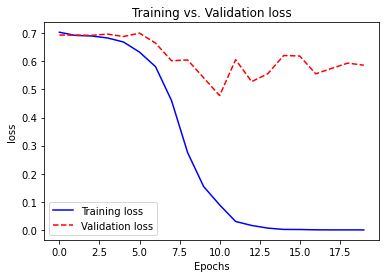

In [20]:
plot_results(history, 'loss')

In [21]:
score = model.evaluate(X_test, y_test)
print(f'#Test accuracy: {score[1]:.3f}')

400/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

#Test accuracy: 0.793
